In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import ndimage as ndi
from lenspack import peaks

/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
#load the data
peaks_noisy = np.load('export_pks_noisy.npz', allow_pickle=True)
peaks_noisy=peaks_noisy['arr_0']
#peaks_noiseless = np.load('export_pks_noiseFree.npz', allow_pickle=True)
#peaks_noiseless=peaks_noiseless['arr_0']
#peaks_trs=np.load('export_trs_noiseFree.npz', allow_pickle=True)
#peaks_trs=peaks_trs['arr_0']
#peaks_trs_noisy=np.load('export_trs_noisy.npz', allow_pickle=True)#
#peaks_trs_noisy=peaks_trs_noisy['arr_0']

In [3]:
peaks_noisy.shape

(4, 10000, 99)

In [4]:
# first index: DM/LowAGN/Fid/HighAGN, second index sim: ID, third index: bin index

In [5]:
DM_only=peaks_noisy[0]
LowAGN=peaks_noisy[1]
Fid=peaks_noisy[2]
HighAGN=peaks_noisy[3]

In [6]:
snr_edges_baryons=np.arange(-6.,10.,.16) 
snr_bins_baryons=0.5*(snr_edges_baryons[:-1]+snr_edges_baryons[1:])
snr_bins_baryons

array([-5.92000000e+00, -5.76000000e+00, -5.60000000e+00, -5.44000000e+00,
       -5.28000000e+00, -5.12000000e+00, -4.96000000e+00, -4.80000000e+00,
       -4.64000000e+00, -4.48000000e+00, -4.32000000e+00, -4.16000000e+00,
       -4.00000000e+00, -3.84000000e+00, -3.68000000e+00, -3.52000000e+00,
       -3.36000000e+00, -3.20000000e+00, -3.04000000e+00, -2.88000000e+00,
       -2.72000000e+00, -2.56000000e+00, -2.40000000e+00, -2.24000000e+00,
       -2.08000000e+00, -1.92000000e+00, -1.76000000e+00, -1.60000000e+00,
       -1.44000000e+00, -1.28000000e+00, -1.12000000e+00, -9.60000000e-01,
       -8.00000000e-01, -6.40000000e-01, -4.80000000e-01, -3.20000000e-01,
       -1.60000000e-01,  5.32907052e-15,  1.60000000e-01,  3.20000000e-01,
        4.80000000e-01,  6.40000000e-01,  8.00000000e-01,  9.60000000e-01,
        1.12000000e+00,  1.28000000e+00,  1.44000000e+00,  1.60000000e+00,
        1.76000000e+00,  1.92000000e+00,  2.08000000e+00,  2.24000000e+00,
        2.40000000e+00,  

In [7]:
DM_mean=np.mean(DM_only,axis=0)
DM_mean.shape

(99,)

In [8]:
LowAGN_mean=np.mean(LowAGN,axis=0)
Fid_mean=np.mean(Fid,axis=0)
HighAGN_mean=np.mean(HighAGN,axis=0)

/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packa

Text(0, 0.5, '$Bar/DM$')

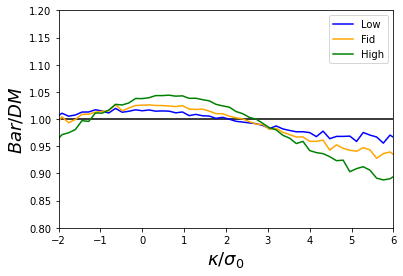

In [10]:
plt.plot(snr_bins_baryons,DM_mean/DM_mean,color='k')
plt.plot(snr_bins_baryons,LowAGN_mean/DM_mean,label='Low',color='blue')
plt.plot(snr_bins_baryons,Fid_mean/DM_mean,label='Fid',color='orange')
plt.plot(snr_bins_baryons,HighAGN_mean/DM_mean,label='High',color='green')
plt.legend()
plt.xlim(-2,6)
plt.ylim(0.8,1.2)
plt.xlabel('$\kappa/\sigma_{0}$',fontsize=18)
plt.ylabel('$Bar/DM$',fontsize=18)

In [11]:
#load our DM-only peaks to test correction
peaks_fiducial=np.load('/Users/vajani/Desktop/CFIS/Peaks_2arcmin_z05/Peaks_z05/convergence_gal_mnv0.10000_om0.30000_As2.1000_peaks_2arcmin_z0.50_b041_snr_max_min_ngal_7.npy')

In [12]:
peaks_fiducial.shape

(10000, 41)

In [13]:
#retrieve snr min and max values of the map
pix_arcmin=3.5*60/512
precision_Peaks=2/pix_arcmin

kappa = fits.getdata('/Users/vajani/Desktop/convergence_gal_mnv0.00000_om0.30000_As2.1000/Maps05/WLconv_z0.50_0001r.fits')
noise=np.load('/Users/vajani/Desktop/CFIS/noise_z05_CFIS.npy',mmap_mode='r')

kappa_noisy = kappa+noise[0]

kappa_noisy_smoothed=ndi.gaussian_filter(kappa_noisy, precision_Peaks)
noise_smoothed_Peaks=ndi.gaussian_filter(noise[0], precision_Peaks)

snr_map=kappa_noisy_smoothed/np.std(noise_smoothed_Peaks)

thresholds_snr = np.linspace( np.min(snr_map), np.max(snr_map), 42)

In [14]:
snr_bins_DMonly=0.5*(thresholds_snr[:-1]+thresholds_snr[1:])

In [20]:
snr_bins_baryons

array([-5.92000000e+00, -5.76000000e+00, -5.60000000e+00, -5.44000000e+00,
       -5.28000000e+00, -5.12000000e+00, -4.96000000e+00, -4.80000000e+00,
       -4.64000000e+00, -4.48000000e+00, -4.32000000e+00, -4.16000000e+00,
       -4.00000000e+00, -3.84000000e+00, -3.68000000e+00, -3.52000000e+00,
       -3.36000000e+00, -3.20000000e+00, -3.04000000e+00, -2.88000000e+00,
       -2.72000000e+00, -2.56000000e+00, -2.40000000e+00, -2.24000000e+00,
       -2.08000000e+00, -1.92000000e+00, -1.76000000e+00, -1.60000000e+00,
       -1.44000000e+00, -1.28000000e+00, -1.12000000e+00, -9.60000000e-01,
       -8.00000000e-01, -6.40000000e-01, -4.80000000e-01, -3.20000000e-01,
       -1.60000000e-01,  5.32907052e-15,  1.60000000e-01,  3.20000000e-01,
        4.80000000e-01,  6.40000000e-01,  8.00000000e-01,  9.60000000e-01,
        1.12000000e+00,  1.28000000e+00,  1.44000000e+00,  1.60000000e+00,
        1.76000000e+00,  1.92000000e+00,  2.08000000e+00,  2.24000000e+00,
        2.40000000e+00,  

In [15]:
snr_bins_DMonly

array([-4.42660892, -4.21304776, -3.99948659, -3.78592542, -3.57236426,
       -3.35880309, -3.14524193, -2.93168076, -2.71811959, -2.50455843,
       -2.29099726, -2.07743609, -1.86387493, -1.65031376, -1.4367526 ,
       -1.22319143, -1.00963026, -0.7960691 , -0.58250793, -0.36894676,
       -0.1553856 ,  0.05817557,  0.27173674,  0.4852979 ,  0.69885907,
        0.91242023,  1.1259814 ,  1.33954257,  1.55310373,  1.7666649 ,
        1.98022607,  2.19378723,  2.4073484 ,  2.62090957,  2.83447073,
        3.0480319 ,  3.26159306,  3.47515423,  3.6887154 ,  3.90227656,
        4.11583773])

In [18]:
indexes=np.where(snr_bins_DMonly<snr_bins_baryons<snr_bins_DMonly)

/Users/vajani/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [19]:
indexes

(array([], dtype=int64),)

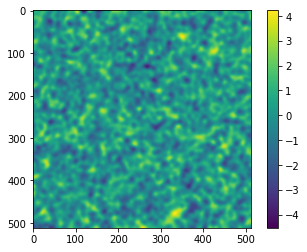

In [16]:
plt.imshow(kappa_noisy_smoothed)
plt.colorbar()